C:\Users\TazeenQ\AppData\Local\Temp\ipykernel_16660\687167137.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_locations, x='TOTSPACE', y='LOC_NAME', palette='viridis')


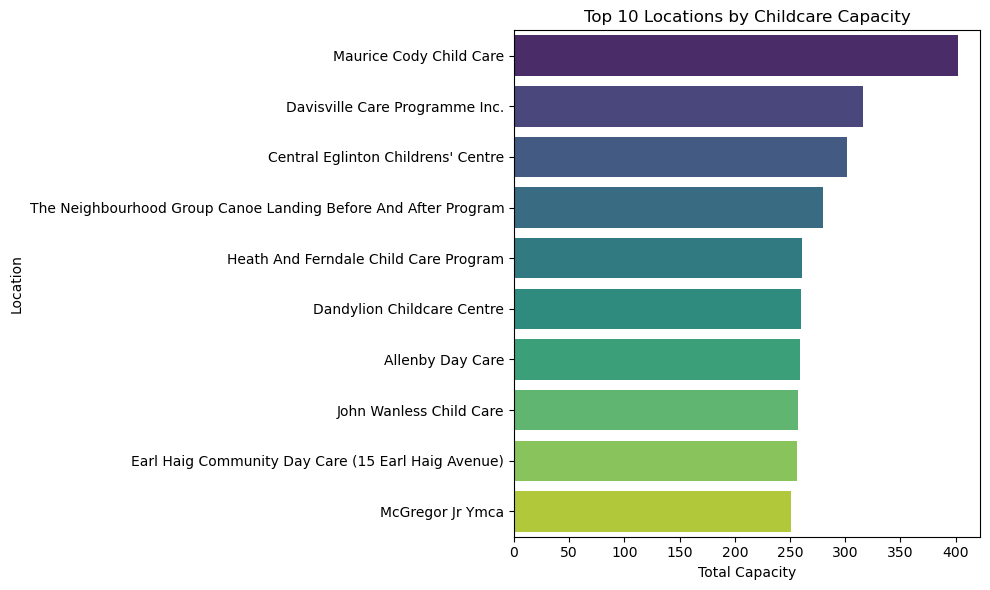

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading my dataset
df = pd.read_csv('C:\\Users\\TazeenQ\\visualization\\02_activities\\assignments\\assignment_4\\Childcare_centres_dataset.csv')

# Data cleaning: Selecting relevant columns and handling missing values
df = df[['LOC_NAME', 'TOTSPACE']].dropna()

# Creating a bar chart of top 10 locations by capacity
top_locations = df.groupby('LOC_NAME')['TOTSPACE'].sum().nlargest(10).reset_index()

# Visualization1 using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_locations, x='TOTSPACE', y='LOC_NAME', palette='viridis')
plt.title('Top 10 Locations by Childcare Capacity')
plt.xlabel('Total Capacity')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

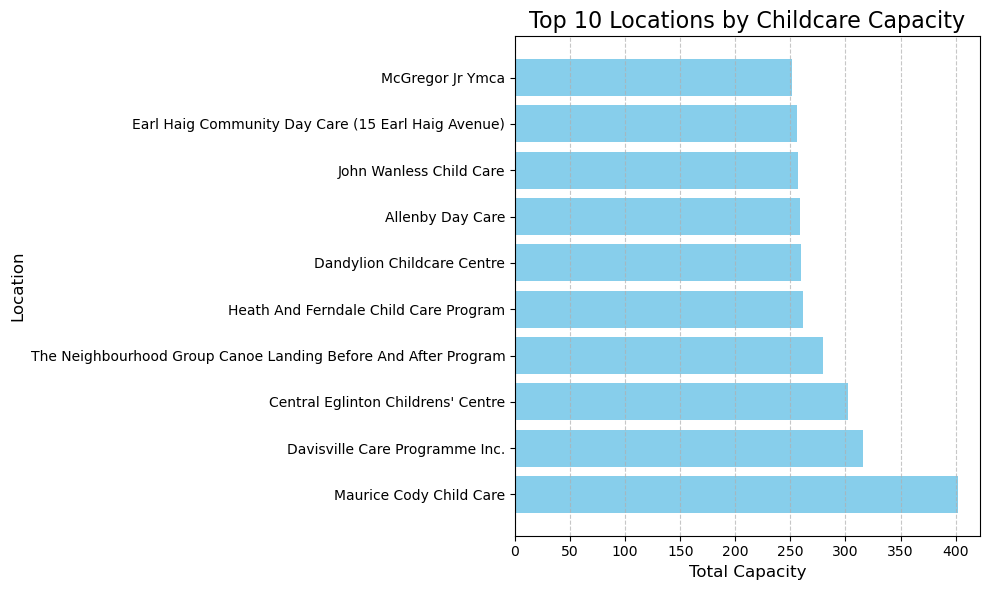

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading my dataset
df = pd.read_csv('C:\\Users\\TazeenQ\\visualization\\02_activities\\assignments\\assignment_4\\Childcare_centres_dataset.csv')

# Data cleaning: Selecting relevant columns and handling missing values
df = df[['LOC_NAME', 'TOTSPACE']].dropna()

# Grouping and selecting the top 10 locations by total capacity
top_locations = df.groupby('LOC_NAME')['TOTSPACE'].sum().nlargest(10).reset_index()

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_locations['LOC_NAME'], top_locations['TOTSPACE'], color='skyblue')

# Adding labels and title
plt.title('Top 10 Locations by Childcare Capacity', fontsize=16)
plt.xlabel('Total Capacity', fontsize=12)
plt.ylabel('Location', fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying the plot
plt.tight_layout()
plt.show()

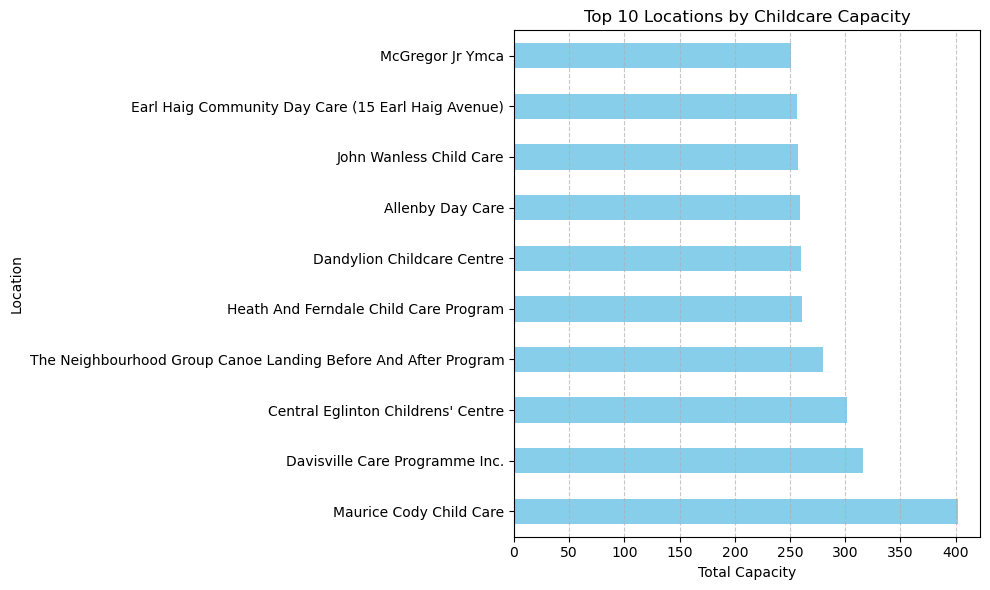

In [ ]:
import pandas as pd

# Loading my dataset
df = pd.read_csv('C:\\Users\\TazeenQ\\visualization\\02_activities\\assignments\\assignment_4\\Childcare_centres_dataset.csv')

# Data cleaning: Selecting relevant columns and handling missing values
df = df[['LOC_NAME', 'TOTSPACE']].dropna()

# Grouping and selecting the top 10 locations by total capacity
top_locations = df.groupby('LOC_NAME')['TOTSPACE'].sum().nlargest(10).reset_index()

# Generating a simple bar chart using Pandas
ax = top_locations.plot(
    kind='barh',
    x='LOC_NAME',
    y='TOTSPACE',
    color='skyblue',
    figsize=(10, 6),
    legend=False,
    title="Top 10 Locations by Childcare Capacity"
)

# Customizing the chart
ax.set_xlabel("Total Capacity")
ax.set_ylabel("Location")
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
plt.show()
